### Client Data

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

Cliient Data

In [ ]:
df_cl=pd.read_csv('/content/client_data.csv')

In [ ]:
df_cl.shape

(8785, 26)

In [ ]:
df_cl.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1.0,18.89,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1.0,6.60,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1.0,25.46,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1.0,47.98,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.0


In [ ]:
df_cl.columns


Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [ ]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8785 non-null   object 
 1   channel_sales                   8785 non-null   object 
 2   cons_12m                        8785 non-null   int64  
 3   cons_gas_12m                    8785 non-null   int64  
 4   cons_last_month                 8785 non-null   int64  
 5   date_activ                      8785 non-null   object 
 6   date_end                        8785 non-null   object 
 7   date_modif_prod                 8785 non-null   object 
 8   date_renewal                    8785 non-null   object 
 9   forecast_cons_12m               8785 non-null   float64
 10  forecast_cons_year              8785 non-null   int64  
 11  forecast_discount_energy        8784 non-null   float64
 12  forecast_meter_rent_12m         87

In [ ]:
df_cl.describe(include='all').style.background_gradient(axis=None, cmap='YlOrRd')

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,14606,14606,14606.000000,14606.000000,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606,14606.000000,14606.000000
unique,14606,8,nan,nan,nan,1796,368,2129,386,nan,nan,nan,nan,nan,nan,nan,2,nan,nan,nan,nan,nan,nan,6,nan,nan
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,nan,nan,nan,2009-08-01,2016-02-01,2015-11-01,2015-06-23,nan,nan,nan,nan,nan,nan,nan,f,nan,nan,nan,nan,nan,nan,lxidpiddsbxsbosboudacockeimpuepw,nan,nan
freq,1,6754,nan,nan,nan,95,145,721,587,nan,nan,nan,nan,nan,nan,nan,11955,nan,nan,nan,nan,nan,nan,7097,nan,nan
mean,nan,nan,159220.286252,28092.375325,16090.269752,nan,nan,nan,nan,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,nan,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,nan,18.135136,0.097152
std,nan,nan,573465.264198,162973.059057,64364.196422,nan,nan,nan,nan,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,nan,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,nan,13.534743,0.296175
min,nan,nan,0.000000,0.000000,0.000000,nan,nan,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,nan,3.300000,0.000000
25%,nan,nan,5674.750000,0.000000,0.000000,nan,nan,nan,nan,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,nan,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,nan,12.500000,0.000000
50%,nan,nan,14115.500000,0.000000,792.500000,nan,nan,nan,nan,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,nan,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,nan,13.856000,0.000000
75%,nan,nan,40763.750000,0.000000,3383.000000,nan,nan,nan,nan,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,nan,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,nan,19.172500,0.000000


In [ ]:
df_cl.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          1
forecast_meter_rent_12m           1
forecast_price_energy_off_peak    1
forecast_price_energy_peak        1
forecast_price_pow_off_peak       1
has_gas                           1
imp_cons                          1
margin_gross_pow_ele              1
margin_net_pow_ele                1
nb_prod_act                       1
net_margin                        1
num_years_antig                   1
origin_up                         1
pow_max                           1
churn                             1
dtype: int64

Show missing values

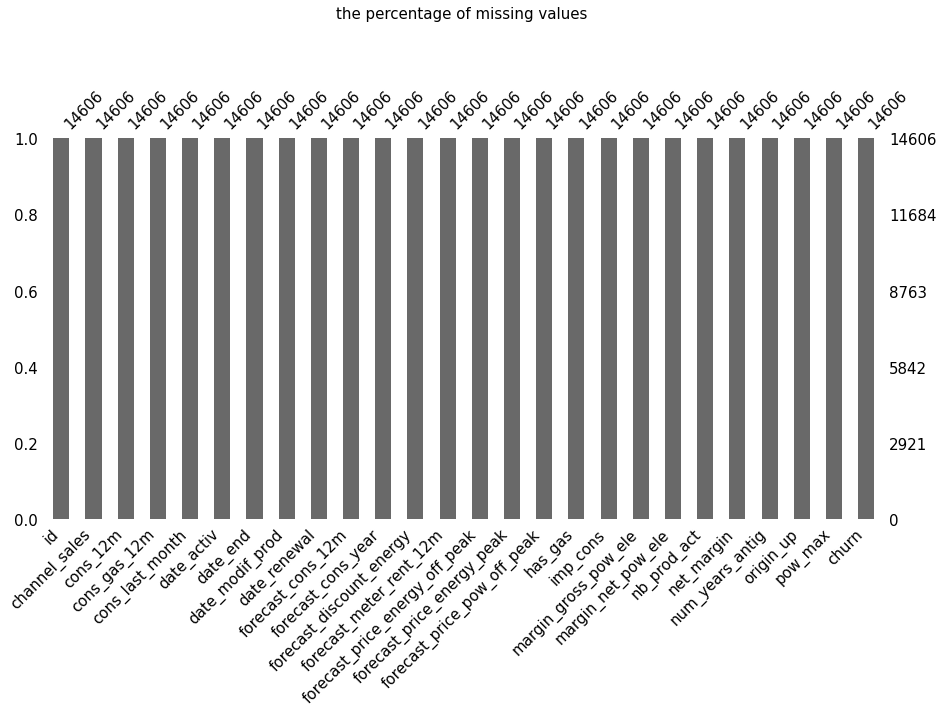

In [ ]:
msno.bar(df_cl,figsize=(15,7),fontsize=15)
plt.title("the percentage of missing values ",y=1.3,fontsize=15)
plt.show()

In [ ]:
df_cl.duplicated().sum()

0

Now Will get Insights about Data 

I will divide data into subsets Columns Related with time forcasting and data specific for clients

Do  frequency count to select unique value counts

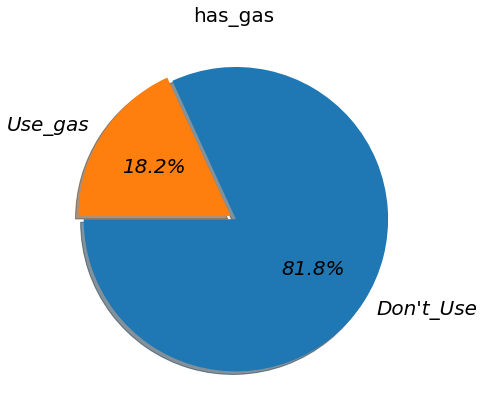

In [ ]:
pie=df_cl["has_gas"].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=[ "Don't_Use","Use_gas"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('has_gas', fontsize=20)
plt.show()

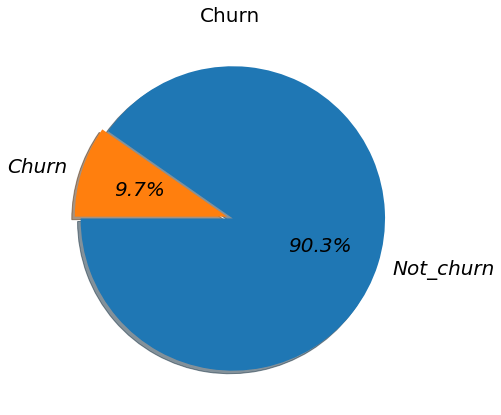

In [ ]:
pie=df_cl["churn"].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=["Not_churn","Churn"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('Churn', fontsize=20)
plt.show()

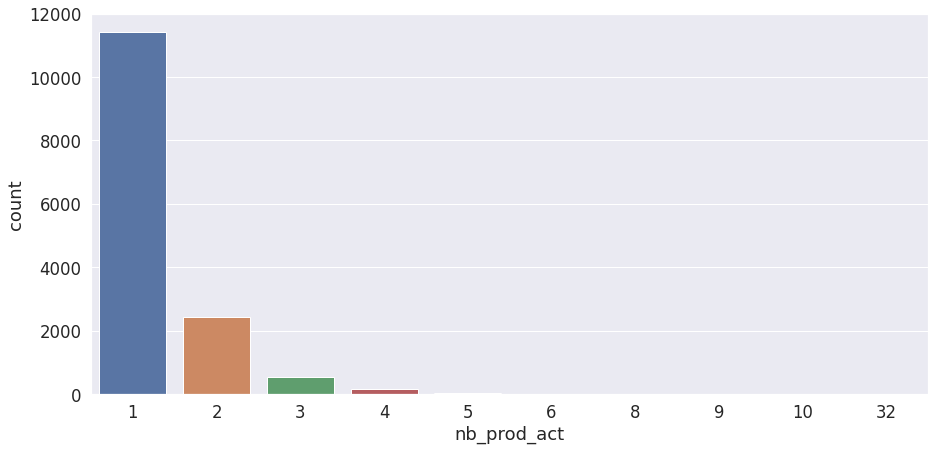

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_cl, x="nb_prod_act")

we have five products the major for sales product one

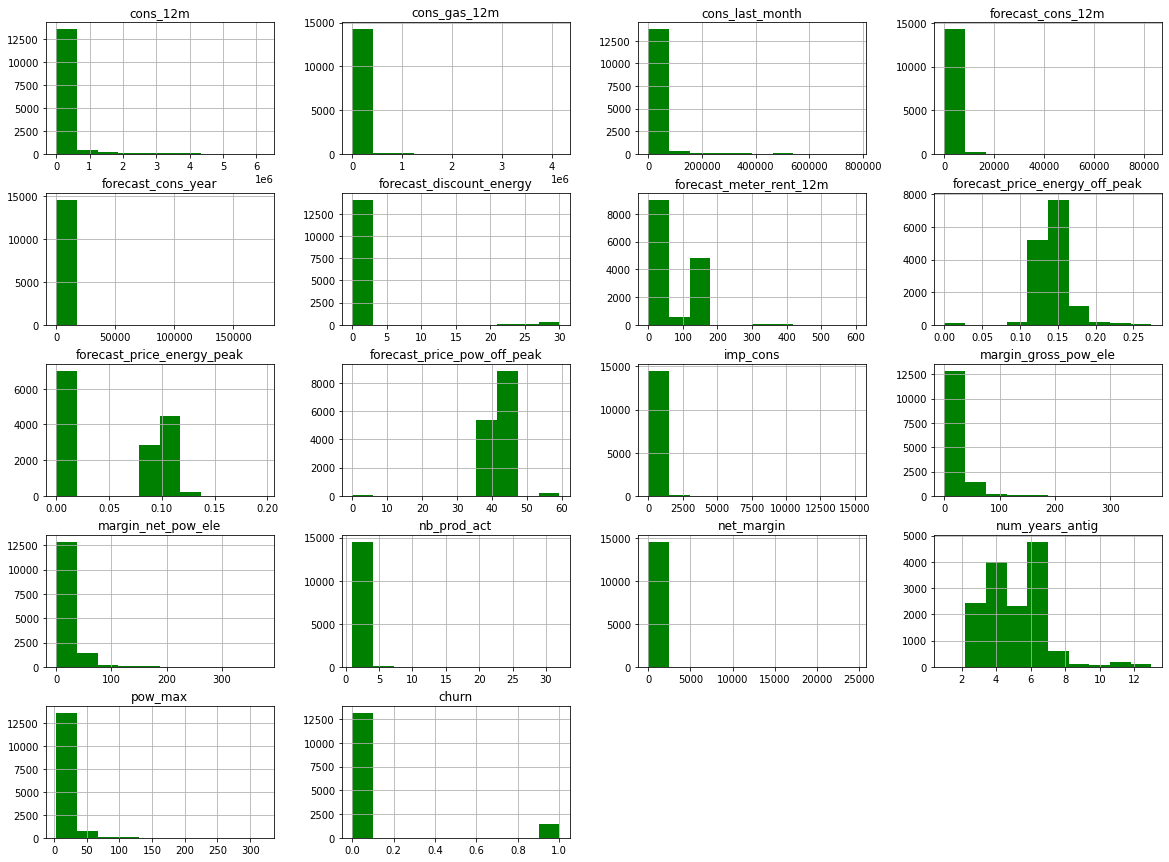

In [ ]:
#histogram to see the distripution of each columns
df_cl.hist(figsize=(20,15),color='green')
plt.show()


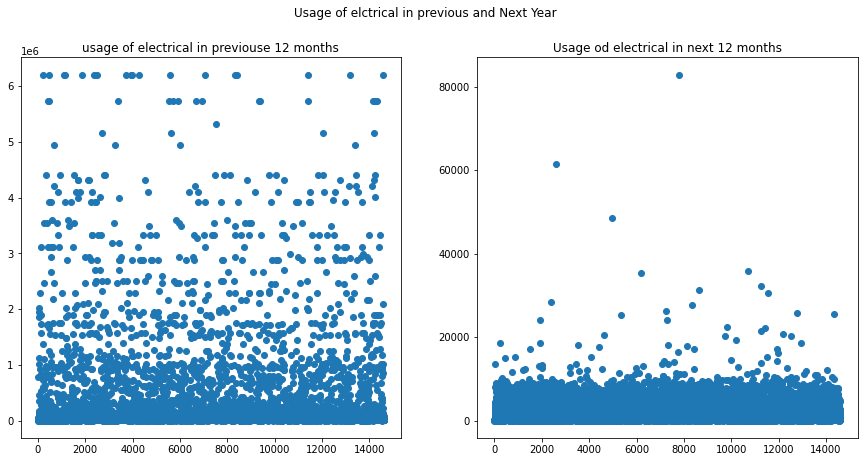

In [ ]:
#electric in previous 12 month and next 12 month

fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].scatter(df_cl.index, df_cl['cons_12m'])
ax[0].set_title("usage of electrical in previouse 12 months")

ax[1].scatter(df_cl.index, df_cl['forecast_cons_12m'])
ax[1].set_title("Usage od electrical in next 12 months")
 
fig.suptitle('Usage of elctrical in previous and Next Year')
plt.show()


Text(0.5, 1.0, 'Usage of Gas in previous 12 months')

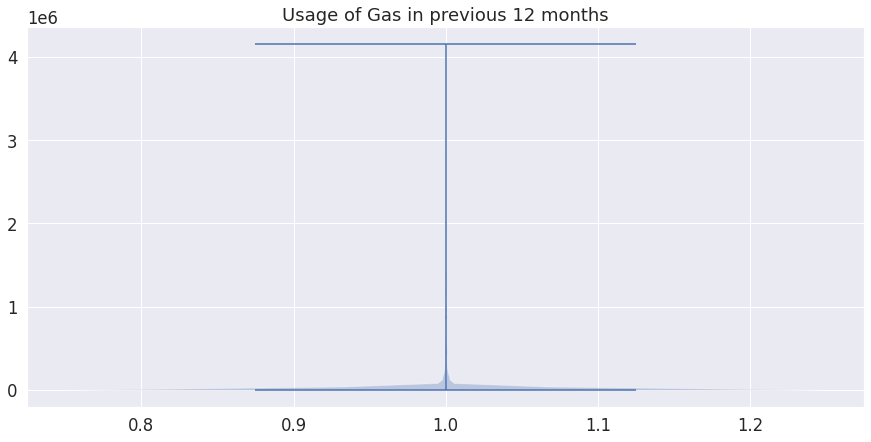

In [ ]:
#useag of gas in previous 12 months 
plt.figure(figsize=(15,7))
plt.violinplot(df_cl['cons_gas_12m'])
plt.title('Usage of Gas in previous 12 months')

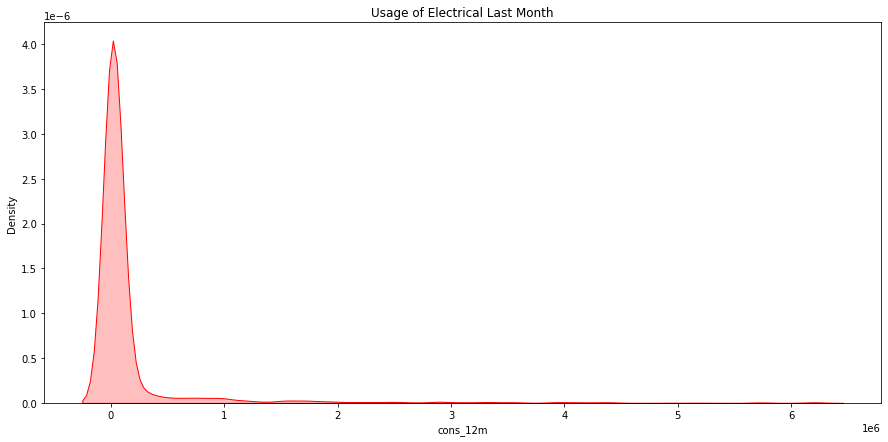

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_cl['cons_12m'], shade=True,color='red')

plt.title("Usage of Electrical Last Month")


plt.show()

Text(0.5, 0.98, 'Forecast of Energy prices')

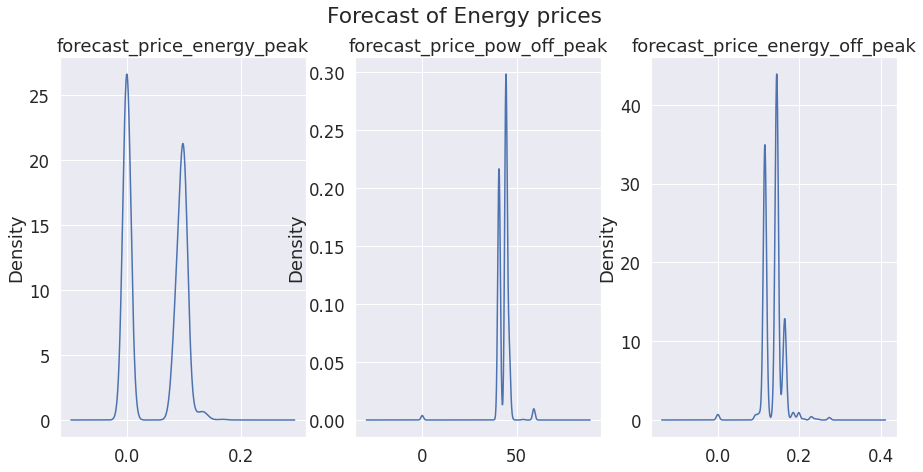

In [ ]:
#let us see te prices of energy in next time

sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 3, figsize=(15, 7))

df_cl['forecast_price_energy_peak'].plot(kind="kde", ax=ax[0])
ax[0].set_title("forecast_price_energy_peak")

df_cl['forecast_price_pow_off_peak'].plot(kind="kde", ax=ax[1])
ax[1].set_title("forecast_price_pow_off_peak")

df_cl['forecast_price_energy_off_peak'].plot(kind="kde", ax=ax[2])
ax[2].set_title("forecast_price_energy_off_peak")

# Add a title to the figure
fig.suptitle("Forecast of Energy prices")



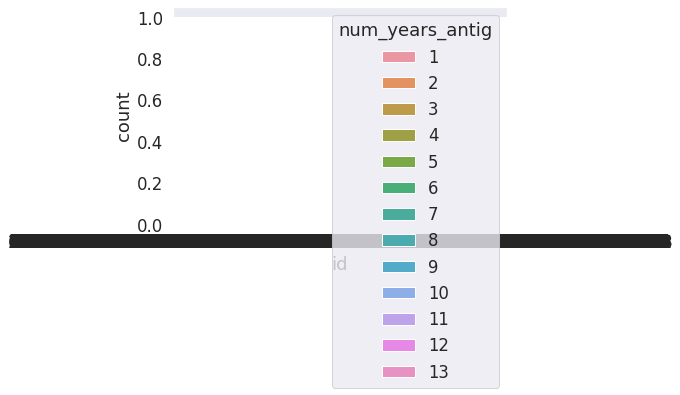

In [ ]:
#present the max_year of each client with service 
sns.countplot(data=df_cl, x='id', hue='num_years_antig')
plt.show()


Text(0.5, 1.0, 'Mean of Net Margin')

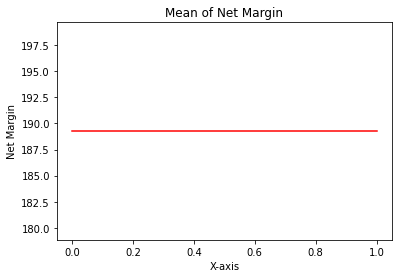

In [ ]:
#get mean of net_margin 
mean_net_margin = df_cl['net_margin'].mean()
#plot result
plt.plot([0, 1], [mean_net_margin, mean_net_margin], color='red')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Net Margin')
plt.title('Mean of Net Margin')

Text(0.5, 1.0, 'Mean of imp_cons')

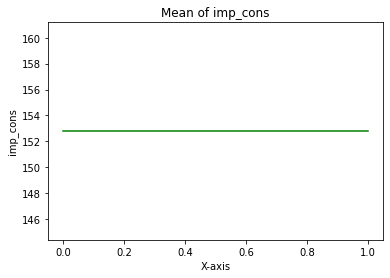

In [ ]:
#get mean of imp_cons
mean_imp_cons = df_cl['imp_cons'].mean()
#plot result
plt.plot([0, 1], [mean_imp_cons, mean_imp_cons], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('imp_cons')
plt.title('Mean of imp_cons')


Text(0.5, 1.0, 'Mean of forecast_meter_rent_12m')

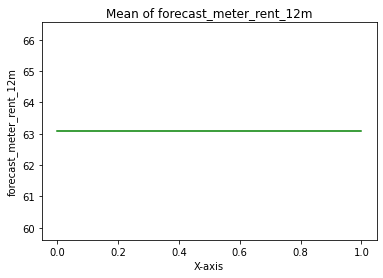

In [ ]:
#get mean of forecast_meter_rent_12m
mean_forecast_meter_rent_12m = df_cl['forecast_meter_rent_12m'].mean()
#plot result
plt.plot([0, 1], [mean_forecast_meter_rent_12m, mean_forecast_meter_rent_12m], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('forecast_meter_rent_12m')
plt.title('Mean of forecast_meter_rent_12m')


In [ ]:
#convert date to date_time
df_cl['date_activ'] = df_cl['date_activ'].apply(pd.to_datetime)
df_cl['date_end'] = df_cl['date_end'].apply(pd.to_datetime)
df_cl['date_modif_prod'] = df_cl['date_modif_prod'].apply(pd.to_datetime)
df_cl['date_renewal'] = df_cl['date_renewal'].apply(pd.to_datetime)

Text(0.5, 1.0, 'date of activation of the contract')

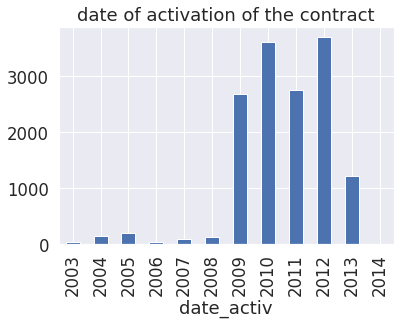

In [ ]:
#see number of client using (ID) with date of activation of the contract
grouped_data = df_cl['id'].groupby(df_cl['date_activ'].dt.year).count()
#plot
grouped_data.plot(kind='bar')
#title
plt.title('date of activation of the contract')


Text(0.5, 1.0, 'registered date of the end of the contract')

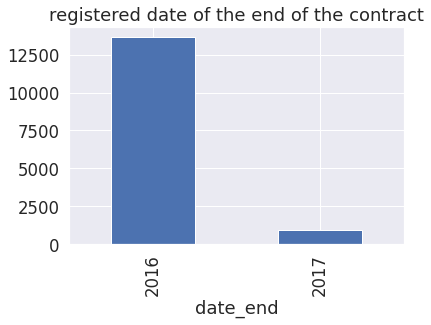

In [ ]:
#see number of client (ID) that registered date of the end of the contract
grouped_data = df_cl['id'].groupby(df_cl['date_end'].dt.year).count()
#plot
grouped_data.plot(kind='bar')
#title
plt.title('registered date of the end of the contract')

Text(0.5, 1.0, 'date of the last modification of the product')

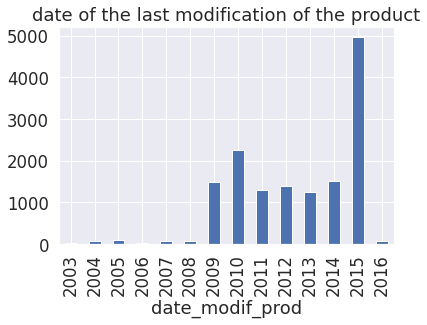

In [ ]:
#see number of clients(ID) that date of the last modification of the product
grouped_data = df_cl['id'].groupby(df_cl['date_modif_prod'].dt.year).count()
#plot
grouped_data.plot(kind='bar')
#title
plt.title('date of the last modification of the product')


Text(0.5, 1.0, 'date of the next contract renewal')

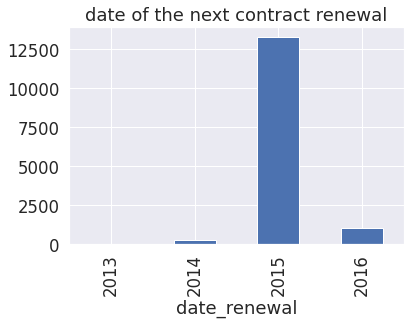

In [ ]:
#number of clients (ID) that date of the next contract renewal
grouped_data = df_cl['id'].groupby(df_cl['date_renewal'].dt.year).count()
#plot
grouped_data.plot(kind='bar')
#title
plt.title('date of the next contract renewal')


Text(0.5, 1.0, 'select the chanel sales with churn to see which chanel will churn and which not')

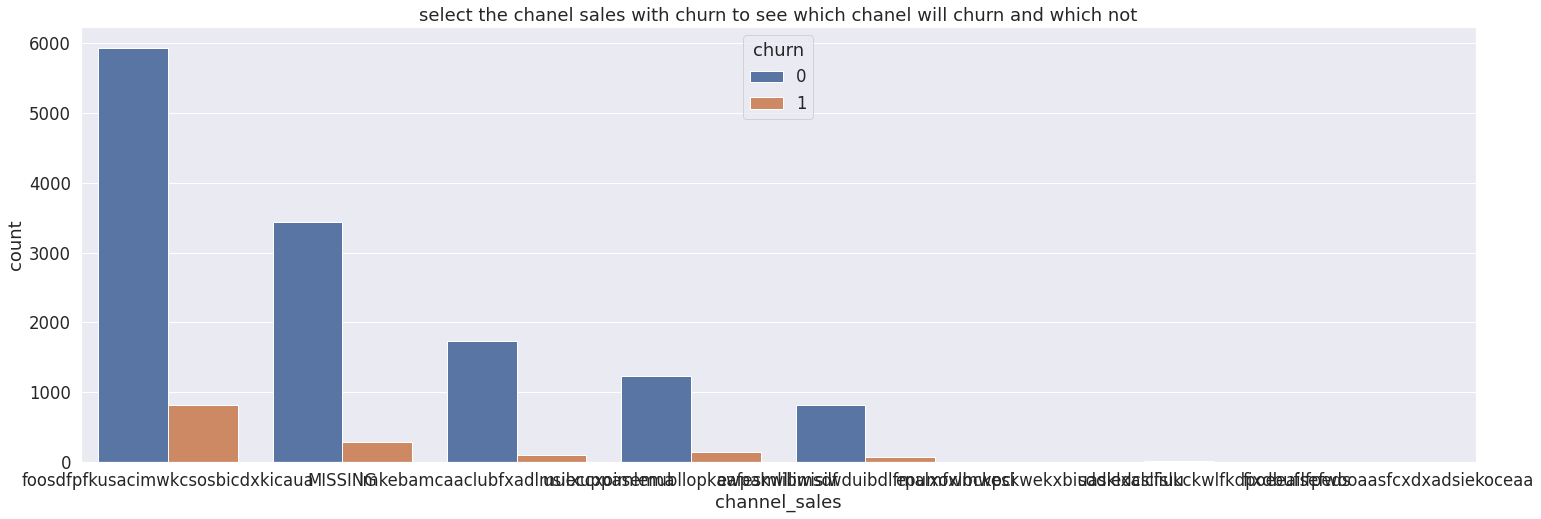

In [ ]:
#select the chanel sales with churn to see which chanel will churn and which not
plt.figure(figsize=(25,8))
sns.countplot(x='channel_sales',hue='churn',data=df_cl)
#titlr
plt.title('select the chanel sales with churn to see which chanel will churn and which not')

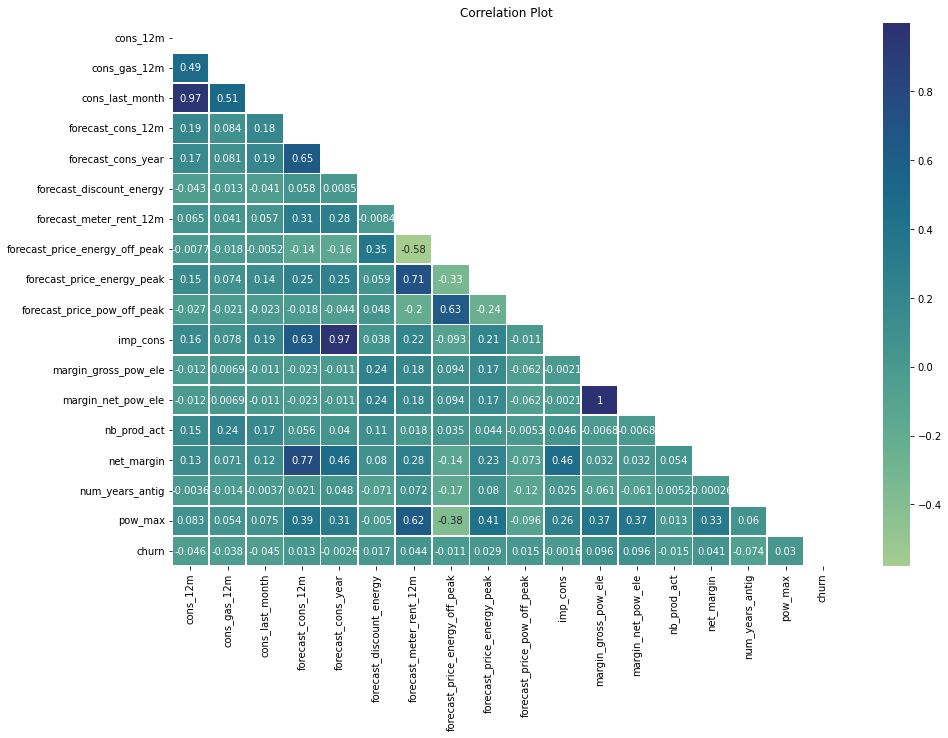

In [ ]:
#correlation
plt.figure(figsize=(15,10))
pd_corr = df_cl.corr()
mask = np.triu(np.ones_like(pd_corr))
sns.heatmap(pd_corr,annot=True,cmap="crest",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

In [ ]:
#transfromatio for column['has_gas']
mapping = {'t': 1, 'f': 0}
df_cl['has_gas'] = df_cl['has_gas'].map(mapping)

In [ ]:
#drop some colmuns
df_cl.drop([
    'cons_last_month','forecast_cons_12m', 'forecast_cons_year','forecast_meter_rent_12m',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 
    'forecast_price_pow_off_peak','margin_gross_pow_ele', 'nb_prod_act',
    'num_years_antig',
    'date_activ','date_end','date_renewal','date_modif_prod',],axis=1,inplace=True)


### price_data

In [ ]:
df_pr=pd.read_csv('/content/price_data.csv')

In [ ]:
df_pr.shape

(12176, 8)

In [ ]:
df_pr.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [ ]:
df_pr.describe(include='all').style.background_gradient(axis=None, cmap='YlOrRd')

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
unique,16096,12,nan,nan,nan,nan,nan,nan
top,038af19179925da21a25619c5a24b745,8/1/2015,nan,nan,nan,nan,nan,nan
freq,12,16094,nan,nan,nan,nan,nan,nan
mean,nan,nan,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,nan,nan,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,nan,nan,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,nan,nan,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,nan,nan,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389


In [ ]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
df_pr.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

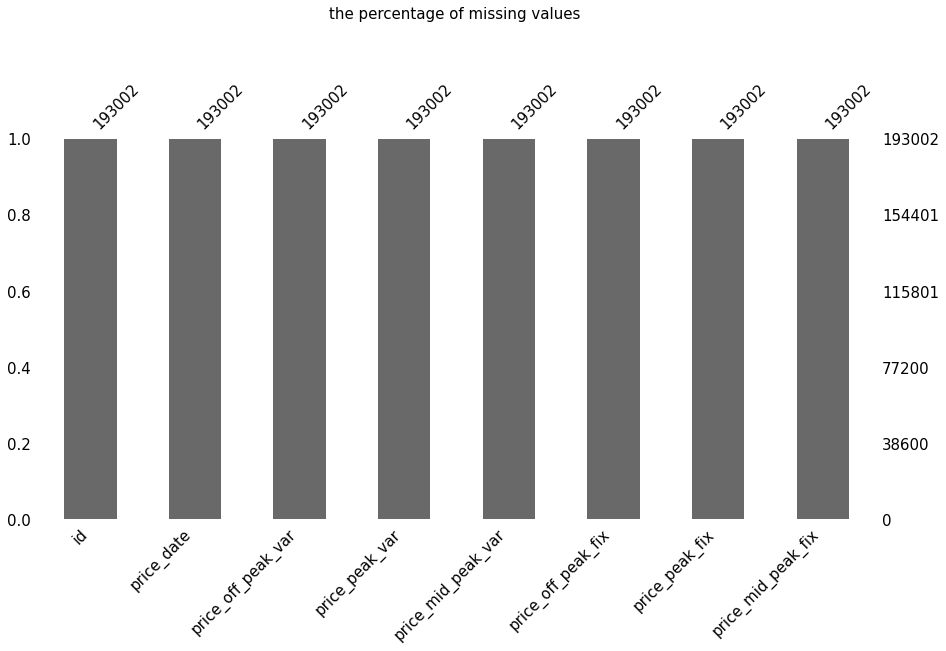

In [ ]:
msno.bar(df_pr,figsize=(15,7),fontsize=15)
plt.title("the percentage of missing values ",y=1.3,fontsize=15)
plt.show()

In [ ]:
df_pr.duplicated().sum()

0

In [ ]:
df_pr['price_date']=df_pr['price_date'].apply(pd.to_datetime)

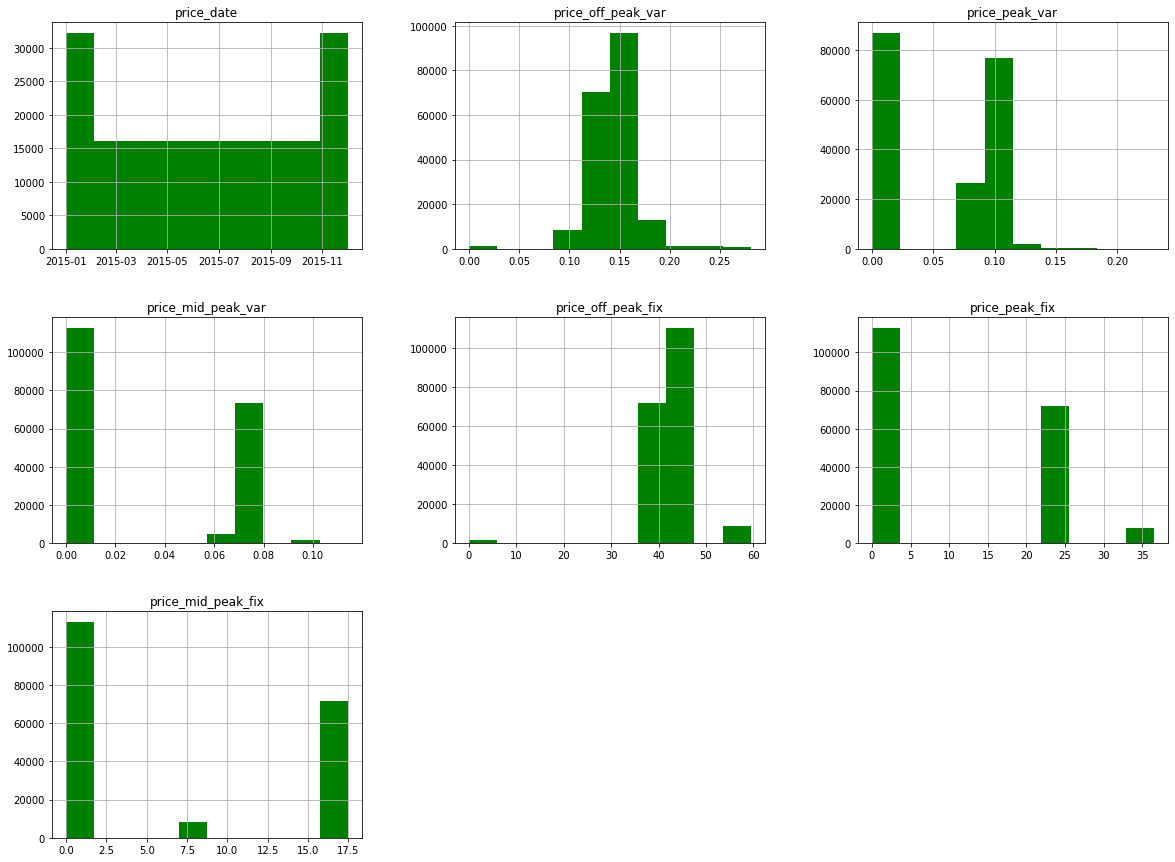

In [ ]:
#histogram to see the distripution of each columns
df_pr.hist(figsize=(20,15),color='green')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


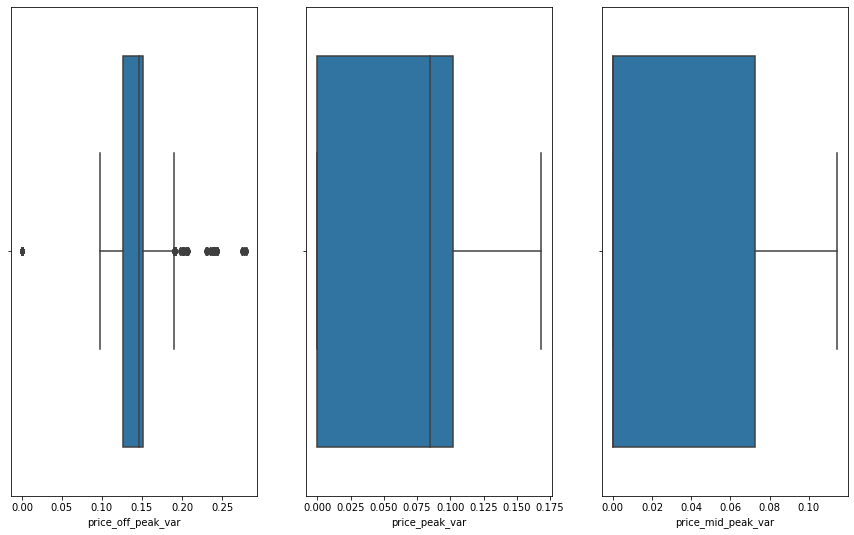

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(1,3,1)
sns.boxplot(df_pr.price_off_peak_var)
plt.subplot(1,3,2)
sns.boxplot(df_pr.price_peak_var)
plt.subplot(1,3,3)
sns.boxplot(df_pr.price_mid_peak_var)
plt.show()

Text(0.5, 1.0, 'price_date of each company identify with ID')

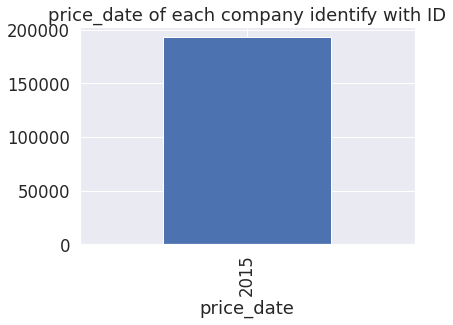

In [ ]:
#get price_date of each company identify with ID
grouped_data = df_pr['id'].groupby(df_pr['price_date'].dt.year).count()
#plot
grouped_data.plot(kind='bar')
#title
plt.title('price_date of each company identify with ID')


Text(0.5, 1.0, 'Mean_price_off_peak_var')

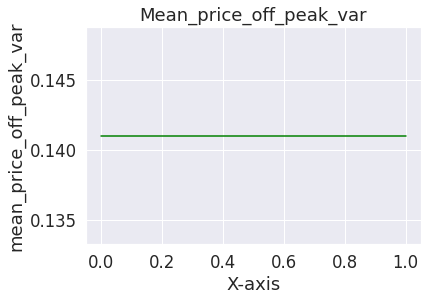

In [ ]:
#get mean of price_off_peak_var
mean_price_off_peak_var= df_pr['price_off_peak_var'].mean()
#plot result
plt.plot([0, 1], [mean_price_off_peak_var, mean_price_off_peak_var], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('mean_price_off_peak_var')
plt.title('Mean_price_off_peak_var')

Text(0.5, 1.0, 'Mean_price_peak_var')

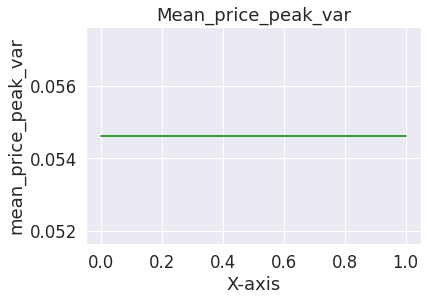

In [ ]:
#get_mean_price_peak_var
mean_price_peak_var= df_pr['price_peak_var'].mean()
#plot result
plt.plot([0, 1], [mean_price_peak_var, mean_price_peak_var], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('mean_price_peak_var')
plt.title('Mean_price_peak_var')

Text(0.5, 1.0, 'Mean_price_mid_peak_var')

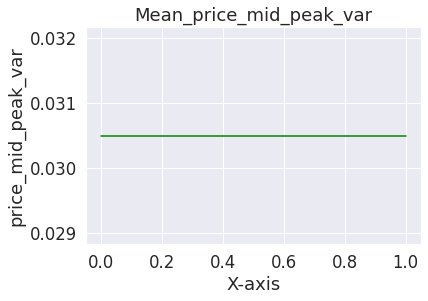

In [ ]:
#get _mean of price_mid_peak_var
mean_price_mid_peak_var= df_pr['price_mid_peak_var'].mean()
#plot result
plt.plot([0, 1], [mean_price_mid_peak_var, mean_price_mid_peak_var], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('price_mid_peak_var')
plt.title('Mean_price_mid_peak_var')

Text(0.5, 1.0, 'Mean_price_off_peak_fix ')

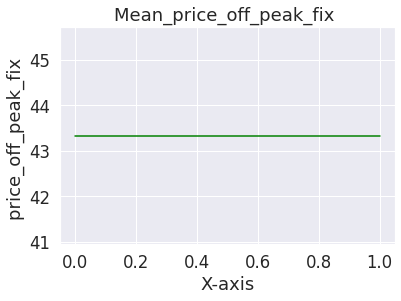

In [ ]:
#get mean of price_off_peak_fix
mean_price_off_peak_fix = df_pr['price_off_peak_fix'].mean()
#plot result
plt.plot([0, 1], [mean_price_off_peak_fix , mean_price_off_peak_fix ], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('price_off_peak_fix ')
plt.title('Mean_price_off_peak_fix ')

Text(0.5, 1.0, 'Mean_price_mid_peak_fix')

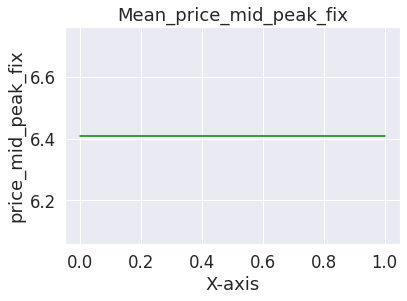

In [ ]:
#get mean of price_mid_peak_fix
mean_price_mid_peak_fix= df_pr['price_mid_peak_fix'].mean()
#plot result
plt.plot([0, 1], [mean_price_mid_peak_fix, mean_price_mid_peak_fix], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('price_mid_peak_fix')
plt.title('Mean_price_mid_peak_fix')

Text(0.5, 1.0, 'Mean_price_peak_fix')

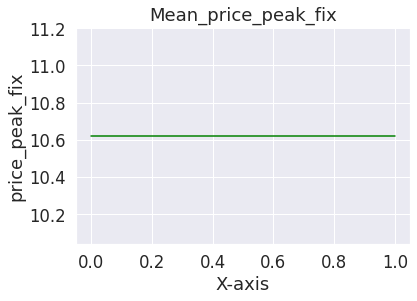

In [ ]:
#get mean of price_peak_fix
mean_price_peak_fix= df_pr['price_peak_fix'].mean()
#plot result
plt.plot([0, 1], [mean_price_peak_fix, mean_price_peak_fix], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('price_peak_fix')
plt.title('Mean_price_peak_fix')

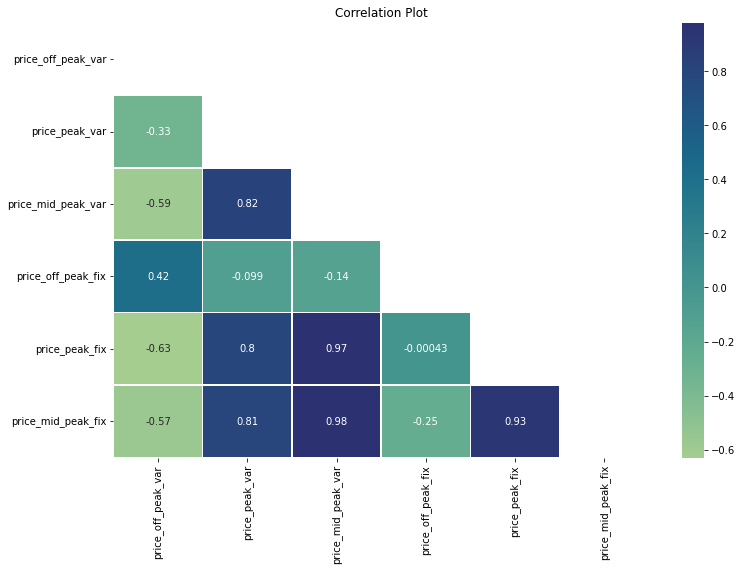

In [ ]:
plt.figure(figsize=(12,8))
pd_corr = df_pr.corr()
mask = np.triu(np.ones_like(pd_corr))
sns.heatmap(pd_corr,annot=True,cmap="crest",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

### Data use in Preprocessing and Model

In [ ]:
client_churn=df_cl[['id','churn']]

In [ ]:
df=pd.merge(df_pr,client_churn,on='id')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6523 entries, 0 to 6522
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  6523 non-null   object        
 1   price_date          6523 non-null   datetime64[ns]
 2   price_off_peak_var  6523 non-null   float64       
 3   price_peak_var      6523 non-null   float64       
 4   price_mid_peak_var  6523 non-null   float64       
 5   price_off_peak_fix  6522 non-null   float64       
 6   price_peak_fix      6522 non-null   float64       
 7   price_mid_peak_fix  6522 non-null   float64       
 8   churn               6523 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 509.6+ KB


In [ ]:
df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    1
price_peak_fix        1
price_mid_peak_fix    1
churn                 0
dtype: int64

In [ ]:
#drop NAN values
df=df.dropna()

In [ ]:
df.duplicated().sum()

0

In [ ]:
#extract catgorical col and convert them into numerical column

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
le=LabelEncoder()
for col in cat_cols:
  df[col] = le.fit_transform(df[col])



In [ ]:
#convert date time
df['price_date'] = df['price_date'].astype(int) // 10**9

<ipython-input-28-d5522143dc04>:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['price_date'] = df['price_date'].astype(int) // 10**9


### Spliting Data

In [ ]:

X=df.drop('churn',axis=1)
y=df['churn']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


### Feature Selection

In [ ]:

model =ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

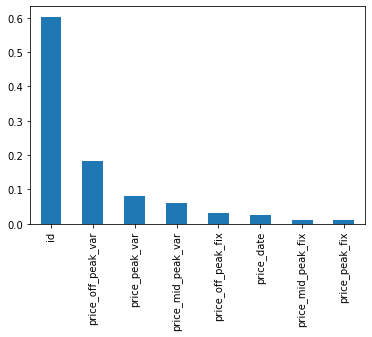

In [ ]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='bar')
plt.show()

## Feature Engineering

In [ ]:

# Create a new feature matrix with polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)


### Data Preprocessing

In [ ]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modeling

In [ ]:
#Random
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
cl.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_train_acc = cl.score(X_train, y_train)
y_test_acc = cl.score(X_test, y_test)


In [ ]:
#Evalute model
y_pred = cl.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1752
         1.0       0.84      0.40      0.54       205

    accuracy                           0.93      1957
   macro avg       0.89      0.69      0.75      1957
weighted avg       0.92      0.93      0.92      1957



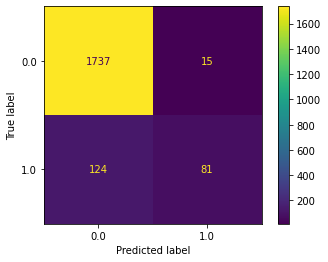

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
cl= DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cl.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_train_acc = cl.score(X_train, y_train)
y_test_acc = cl.score(X_test, y_test)


In [ ]:
#Evalute model
y_pred = cl.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1752
         1.0       0.92      0.90      0.91       205

    accuracy                           0.98      1957
   macro avg       0.96      0.94      0.95      1957
weighted avg       0.98      0.98      0.98      1957



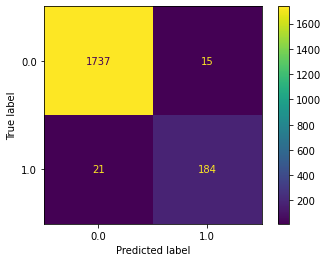

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
cl= LogisticRegression(random_state = 0)
cl.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
y_train_acc = cl.score(X_train, y_train)
y_test_acc = cl.score(X_test, y_test)


In [ ]:
#Evalute model
y_pred = cl.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94      1752
         1.0       0.00      0.00      0.00       205

    accuracy                           0.90      1957
   macro avg       0.45      0.50      0.47      1957
weighted avg       0.80      0.90      0.85      1957



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


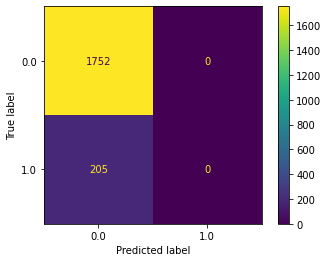

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()